#  Machine Learning - Prescriptive Modeling

## Clustering Cities Using the KMeans Model 

## How can we group cities based on sales performance to uncover patterns for better sales strategy?

### 1. Overview

In a competitive business environment where sales performance can vary significantly across locations, understanding geographic sales patterns is critical for strategic planning. This project leverages KMeans Clustering, a machine learning technique, to segment cities based on their Total Sales and Units Purchased. By grouping similar-performing cities, the analysis provides actionable insights that can shape targeted marketing strategies, resource allocation, and performance improvement initiatives. The result is a visual and data-driven framework to support smarter, more localized business decisions.

### 2. Goal

- To group cities into distinct clusters based on their total sales revenue and units purchased.
- To identify underlying patterns in city-level sales performance.
- To visualize city clusters and explore performance similarities or differences.
- To provide data-driven recommendations for refining sales strategy, resource distribution, and market penetration.

###  3. Business Challenge

- Inconsistent sales performance across multiple cities with limited understanding of the root causes.
- Difficulty in prioritizing regions for sales efforts and investment.
- Inefficient marketing and sales allocation, leading to suboptimal ROI.
- Lack of segmentation intelligence for customized regional strategies.

###  4. Methodology

- Data Preparation: Cleaned and grouped city-level sales and purchase data from the dataset.
- Feature Selection: Focused on Total Sales and Units Purchased as key performance indicators.
- Modeling: Applied KMeans Clustering to categorize cities into 3 distinct performance clusters.
- Visualization: Developed a scatter plot to represent cluster assignments with intuitive color mapping.
- Insight Reporting: Created a summary table to present each city’s cluster, sales, and purchase volume.
- Strategic Interpretation: Used clustering output to recommend targeted actions for high, mid, and low-performing cities.

## Let's take a deep dive into the data

### Import necessary libraries

In [11]:
import pandas as pd
import os
import glob

In [12]:
folder_path = r"C:\Monthly_Sales"

# Retrieve all CSV files from the folder using glob
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# All CSV files combined as one DataFrame 
all_data = pd.concat([pd.read_csv(file) for file in all_files], ignore_index=True)

# Merged DataFrame saved into a new CSV
output_file = os.path.join(folder_path, "all_data.csv")
all_data.to_csv(output_file, index=False)

print("All files integrated into:", output_file)

All files integrated into: C:\Monthly_Sales\all_data.csv


### Load the updated DataFrame

In [14]:
# Skip Blank Rows if present in the dataset

df = pd.read_csv(r'C:\Monthly_Sales\all_data.csv', skip_blank_lines=True)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
0,175667,iPhone,1,700.0,04/24/24 19:12,"135 Meadow St, Boston, MA 02215"
1,175668,AA Batteries (4-pack),1,5.84,04/20/24 13:45,"592 4th St, San Francisco, CA 94016"
2,175669,AA Batteries (4-pack),1,5.84,04/28/24 09:17,"632 Park St, Dallas, TX 75001"
3,175670,AA Batteries (4-pack),2,5.84,04/23/24 14:06,"131 Pine St, San Francisco, CA 94016"
4,175671,Samsung Odyssey Monitor,1,409.99,04/23/24 12:13,"836 Forest St, Boston, MA 02215"


## Data Cleaning Process

Thoroughly clean and standardize the data to eliminate errors, ensure consistency, and build a solid foundation for meaningful insights.

### Find and remove rows with NaN values

In [17]:
df.isna().sum()

Order ID            24640
Product Name        24640
Units Purchased     24642
Unit Price          24642
Order Date          24643
Delivery Address    24644
dtype: int64

In [18]:
# If Nan value is present in Order ID and Unit Purchased, it will be impossible to manipulate the data.
# Therefore, drop Nan values in Order ID and Units Purchased.

df.dropna(subset=['Order ID', 'Units Purchased'], inplace=True)

# Check if Nan value is present
df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     0
Unit Price          0
Order Date          1
Delivery Address    2
dtype: int64

In [19]:
# Further check if any NaN values or blank rows are present

blank_rows_na = df[df.isnull().any(axis=1)]
blank_rows_na

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
2195228,Charging Cable,1,14.95,05/24/24 07:04,"852 Hickory St, San Francisco, CA 94016",NaN
3001506,150766,iPhone,1,7,NaN,NaN


### Find and remove rows with duplicate values

In [21]:
# Find duplicate values

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
9489202     True
9489203     True
9489204     True
9489205     True
9489206     True
Length: 9464565, dtype: bool

In [22]:
# Check again for duplicated values

df.drop_duplicates(inplace = True)

# Check again for duplicated values
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
172530     False
2195228    False
3001506    False
6370083    False
6403571    False
Length: 171546, dtype: bool

### Verify and fix incorrect data types in the dataset

In [24]:
# check for data types

df.dtypes

Order ID            object
Product Name        object
Units Purchased     object
Unit Price          object
Order Date          object
Delivery Address    object
dtype: object

### Fix incorrect data types

In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

df['Units Purchased'] = pd. to_numeric(df['Units Purchased'], errors='coerce')

df['Unit Price'] = pd. to_numeric(df['Unit Price'], errors='coerce')

In [27]:
# Verify the presence of NaN values remaining in the columns as a result of using errors='coerce' during data conversion.

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     1
Unit Price          2
Order Date          3
Delivery Address    2
dtype: int64

In [28]:
df = df.dropna()

### Change the data type to optimize memory usage (Optional)

In [30]:
df['Order ID'] = pd.to_numeric(df['Order ID'], downcast='integer') 
df['Product Name'] = df['Product Name'].astype('category')  
df['Units Purchased'] = df['Units Purchased']. astype('int8') 
df['Unit Price'] = pd.to_numeric(df['Unit Price'], downcast='float')   
df['Delivery Address'] = df['Delivery Address'].astype('category') 

## Expand the dataset with supplementary columns

In [32]:
# Add City column

def city(address):
    return address.split(",")[1].strip(" ")

def state_abbrev(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Delivery Address'].apply(lambda x: f"{city(x)}  ({state_abbrev(x)})")
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,City
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",Boston (MA)
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",San Francisco (CA)
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",Dallas (TX)
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",San Francisco (CA)
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",Boston (MA)


In [33]:
# Add Total Sales column

df['Total Sales'] = df['Units Purchased'] * df['Unit Price']
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,City,Total Sales
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",Boston (MA),700.00000
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",San Francisco (CA),5.84000
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",Dallas (TX),5.84000
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",San Francisco (CA),11.68000
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",Boston (MA),409.98999


### Format Unit Price and Total Sales to 2 decimal places

In [35]:
df['Unit Price'] = df['Unit Price'].apply(lambda x: "%.2f" % x)

df['Total Sales'] = df['Total Sales'].apply(lambda x: "%.2f" % x)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,City,Total Sales
0,175667,iPhone,1,700.00,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",Boston (MA),700.00
1,175668,AA Batteries (4-pack),1,5.84,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",San Francisco (CA),5.84
2,175669,AA Batteries (4-pack),1,5.84,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",Dallas (TX),5.84
3,175670,AA Batteries (4-pack),2,5.84,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",San Francisco (CA),11.68
4,175671,Samsung Odyssey Monitor,1,409.99,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",Boston (MA),409.99


In [36]:
# Convert from string to numeric

df['Unit Price'] = pd.to_numeric(df['Unit Price'])
df['Total Sales'] = pd.to_numeric(df['Total Sales'])

In [37]:
df.dtypes

Order ID                     int32
Product Name              category
Units Purchased               int8
Unit Price                 float64
Order Date          datetime64[ns]
Delivery Address          category
City                        object
Total Sales                float64
dtype: object

### Organize Data by Order Date Chronologically and Reindex

In [39]:
df = df.sort_values(by = 'Order Date')

df = df.reset_index(drop=True)
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,City,Total Sales
0,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",Portland (OR),400.99
1,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",Atlanta (GA),4.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",San Francisco (CA),4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",Portland (OR),600.00
4,156535,iPhone,1,700.00,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",Los Angeles (CA),700.00
...,...,...,...,...,...,...,...,...
171538,297748,iPhone,1,700.00,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",Los Angeles (CA),700.00
171539,284606,Bose SoundSport Headphones,1,99.99,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",Boston (MA),99.99
171540,302330,AA Batteries (4-pack),1,5.84,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",San Francisco (CA),5.84
171541,284711,AA Batteries (4-pack),1,5.84,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",San Francisco (CA),5.84


#### Replace 'Boston  (\rA)' with 'Boston  (MA)'

In [41]:
import re

df['City'] = df['City'].str.replace(r'Boston\s+\(\rA\)', 'Boston  (MA)', regex=True)

## Plot City Clustering using KMeans

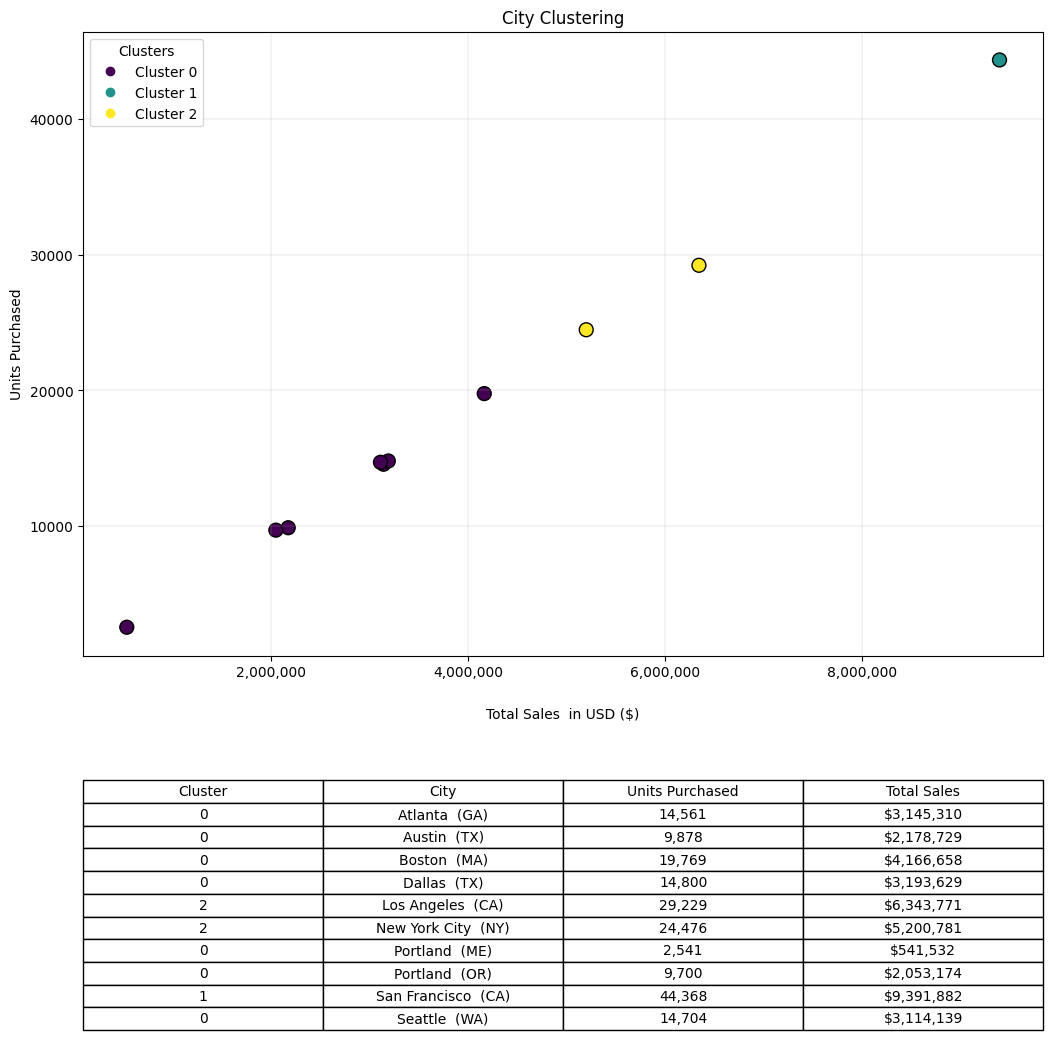

In [43]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.cluster import KMeans

# Deep copy to avoid modifying the original DataFrame
df_cluster = df.copy(deep=True)

# Cluster Cities based on total sales
city_sales_data = df_cluster.groupby('City').agg({'Total Sales': 'sum','Units Purchased': 'sum'}).reset_index()

city_sales_data.columns = city_sales_data.columns.str.strip()
city_sales_data['City'] = city_sales_data['City'].astype(str).str.replace(r'[\r\n\t]', '', regex=True).str.strip()

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
city_sales_data['Cluster'] = kmeans.fit_predict(city_sales_data[['Total Sales', 'Units Purchased']])

fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
df_scatter = ax.scatter(
    city_sales_data['Total Sales'],
    city_sales_data['Units Purchased'],
    c=city_sales_data['Cluster'],
    cmap='viridis',
    s=100,
    edgecolor='black'
)

# Axis labels and formatting
ax.set_xlabel('Total Sales  in USD ($)', labelpad=20)    
ax.set_ylabel('Units Purchased')
ax.set_title('City Clustering')
ax.grid(linewidth=0.2)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Legend
handles, _ = df_scatter.legend_elements()
ax.legend(handles, [f'Cluster {i}' for i in range(len(handles))], title='Clusters')

# Prepare table data
table_data = city_sales_data[['Cluster', 'City', 'Units Purchased', 'Total Sales']].copy()
table_data['Units Purchased'] = table_data['Units Purchased'].apply(lambda x: f'{x:,.0f}')
table_data['Total Sales'] = table_data['Total Sales'].apply(lambda x: f'${x:,.0f}')

cell_text = table_data.values.tolist()
columns = table_data.columns.tolist()

table = plt.table(
    cellText=cell_text,
    colLabels=columns,
    loc='bottom',
    cellLoc='center',
    bbox=[0.0, -0.6, 1, 0.4]  # Lowered the table further
)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.subplots_adjust(left=0.1, bottom=0.10) 

plt.show()

## Key Insights and Strategic Recommendations

### 1. Cluster 0 – High Sales & High Volume Cities

#### Interpretation:

- Cities in this cluster show strong performance in both revenue and unit sales.
- Indicates high demand, strong customer base, and effective local execution.
    

### Strategic Recommendations:

- Double down on success: Increase inventory levels, staffing, and marketing budget.
- Introduce loyalty programs to retain high-value customers.
- Launch premium products or upsell/cross-sell strategies, these cities are more likely to adopt.
- Consider using these cities as benchmarks or pilots for new product launches.


### 2. Cluster 1 – Moderate Sales & Moderate Volume Cities

#### Interpretation:

- These cities perform reasonably well but have room for growth.
- Represents stable markets with potential to be moved into the high-performing cluster.


###  Strategic Recommendations:

- Localized promotions to drive awareness and increase repeat purchases.
- Sales training or incentive programs to boost performance.
- Monitor customer behavior and competitor activity.


### 3. Cluster 2 – Low Sales & Low Volume Cities

#### Interpretation:

- Underperforming regions with low revenue and low units sold.
- Maybe an indication of market saturation, low demand, or ineffective sales presence.
    

### Strategic Recommendations:

- Cost-efficiency measures: Evaluate whether continued investment is justified.
- Reassess market potential: Are these markets viable with a different strategy?